This is a simple script fitting Gaussian peaks to background subtracted EELS data.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import optimize
from sklearn.metrics import r2_score


Define a Gaussian $f(x)=ae^{(-(x-\mu)^2/(2\sigma^2))}+c$

In [2]:
def Gaussian(x, height, mean, FWHM, offset):
    return height*np.exp(-(x-mean)**2/(2*FWHM**2))+offset

Define an error function:

In [3]:
def errorfunc(p, n_peak, x, y):
    sum = 0
    for i in range(n_peak):
        sum += Gaussian(x, p[i*3], p[i*3+1], p[i*3+2], 0)
    sum += p[-1]
    return (sum-y)**2

Read and plot the data in csv form, the first column is energy, second column is intensity.

<IPython.core.display.Javascript object>


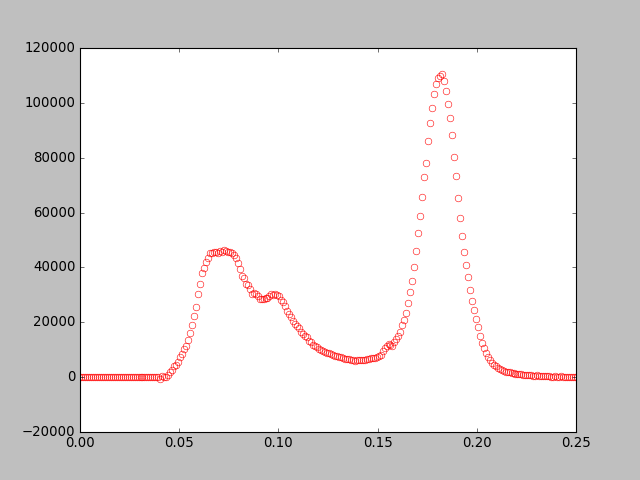

In [4]:
data = np.genfromtxt('data.csv', delimiter=",")
plt.style.use('classic')
fig, ax = plt.subplots()
ax.set_xlim(0, 0.25)
plt.plot(data[:, 0], data[:, 1], marker='o', markeredgecolor='red', markerfacecolor='none', markeredgewidth=0.5, ls="", label='measurement')

Input guessing parameters. The parameter should be in this form: ($a_1, \mu_1, \sigma_1, a_2, \mu_2, \sigma_2 ..., c)$. Usually the offset $c$ is 0.

In [5]:
n_peak = 5
Parameter_guess = [45000, 0.0665, 0.01, 45000, 0.0745, 0.01, 30000, 0.0985, 0.01, 10000, 0.1555, 0.01, 110000, 0.1805, 0.01, 0]

Fitting.

In [6]:
results= optimize.least_squares(errorfunc, Parameter_guess, args=(n_peak, data[:, 0], data[:, 1]))
print('The peaks are at:')
Parameter=results.get('x')
for i in range(n_peak):
    print('%s meV'%(int(1000*Parameter[i*3+1])))
sum = 0
for i in range(n_peak):
        sum += Gaussian(data[:, 0], Parameter[i*3], Parameter[i*3+1], Parameter[i*3+2], 0)
sum += Parameter[-1]
print('The r square value is %.4f'%(r2_score(data[:, 1], sum)))

The peaks are at:
65 meV
77 meV
92 meV
174 meV
181 meV
The r square value is 0.9988


<IPython.core.display.Javascript object>


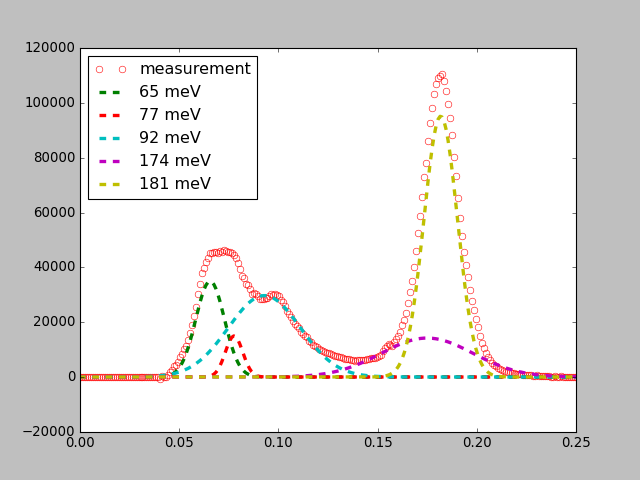

<function matplotlib.pyplot.show(block=None)>

In [7]:
plt.style.use('classic')
fig, ax = plt.subplots()
ax.set_xlim(0, 0.25)
plt.plot(data[:, 0], data[:, 1], marker='o', markeredgecolor='red', markerfacecolor='none', markeredgewidth=0.5, ls="", label='measurement')
for i in range(n_peak):
    plt.plot(data[:, 0], Gaussian(data[:, 0], Parameter[i*3], Parameter[i*3+1], Parameter[i*3+2],
             Parameter[-1]/n_peak), ls="--", lw=3, label='%s meV' % (int(1000*Parameter[i*3+1])))

plt.legend(loc='best')
plt.show